In [30]:
import pandas as pd
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from os import path
import numpy as np
from PIL import Image
import os
import random

In [44]:
def orange_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(17,{}%,{}%)".format(random.randint(85, 100),random.randint(40, 70))

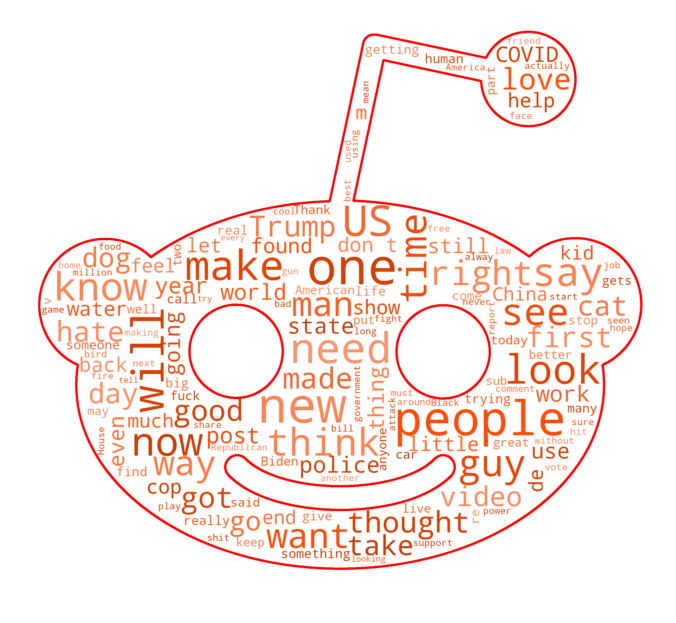

In [45]:
#read dataframe
data = pd.read_csv("../scraping data/data/data_subreddit_cleaned.csv",index_col=0)
#create a string that contains all unique titles
titles = list(pd.unique(data["title"]))
text = "".join(titles)
#import logo reddit to set as mask
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask = np.array(Image.open(path.join(d, "images/reddit-logo.png")))
# add stopwords those are words we don't want to see in the wordcloud
stopwords = set(STOPWORDS)
stopwords.add("s")
stopwords.add("u")
#generate wordcloud
wc = WordCloud(background_color="white",contour_width=15, contour_color='red',
               stopwords=stopwords,mask=mask,max_words=150).generate(text)

default_colors = wc.to_array()
# show
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.imshow(wc.recolor(color_func=orange_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.show()